# VU DMT Assignment 2 - group 128

### "More specifically, your task is to predict what hotel a user is most likely to book." --> kaggle description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
df_comb = pd.read_csv("data/training_set_VU_DM.csv")
df_submission = pd.read_csv("data/submission_sample.csv")
df_test = pd.read_csv("data/test_set_VU_DM.csv")

Check raw datasat

In [3]:
# display(df_comb)
# df_comb.shape
df_comb.head
# df_comb.info()
df_comb.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [4]:
# Check the percentage of missing data in dataset
total = df_comb.isnull().sum().sort_values(ascending=False)
percent = (df_comb.isnull().sum()/df_comb['prop_id'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)
missing_data

,Total,Percent
comp1_rate_percent_diff,4863908,0.980954
comp6_rate_percent_diff,4862173,0.980604
comp1_rate,4838417,0.975813
comp1_inv,4828788,0.973871
comp4_rate_percent_diff,4827261,0.973563
gross_bookings_usd,4819957,0.972089
comp7_rate_percent_diff,4819832,0.972064
comp6_rate,4718190,0.951565
visitor_hist_starrating,4706481,0.949204
visitor_hist_adr_usd,4705359,0.948977


Tried to check base stats, but there are too many columns so will need to drop some first in order to get a better idea

In [5]:
base_stats = []

for col in df_comb:
    stats_col = df_comb[col].describe()
    base_stats.append(stats_col)
    
print(base_stats)

[count    4.958347e+06
mean     1.663666e+05
std      9.611223e+04
min      1.000000e+00
25%      8.293600e+04
50%      1.665070e+05
75%      2.497240e+05
max      3.327850e+05
Name: srch_id, dtype: float64, count                 4958347
unique                 198615
top       2012-11-02 14:04:51
freq                       95
Name: date_time, dtype: object, count    4.958347e+06
mean     9.953133e+00
std      7.646890e+00
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      1.400000e+01
max      3.400000e+01
Name: site_id, dtype: float64, count    4.958347e+06
mean     1.753405e+02
std      6.591625e+01
min      1.000000e+00
25%      1.000000e+02
50%      2.190000e+02
75%      2.190000e+02
max      2.310000e+02
Name: visitor_location_country_id, dtype: float64, count    251866.000000
mean          3.374334
std           0.692519
min           1.410000
25%           2.920000
50%           3.450000
75%           3.930000
max           5.000000
Name: visitor_hist_sta

Price distribution per hotel (ranging between 0 and 600 usd)

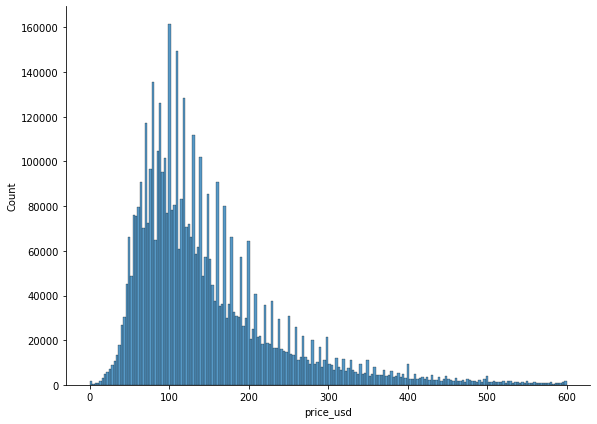

In [6]:
sns_distplot = sns.displot(data=df_comb, x='price_usd', kind='hist',
            height=6, aspect=1.4, bins=200,
            binrange=(0,600))

sns_distplot.figure.savefig("plots/distplot.png")
# price_counted = df_comb['price_usd'].value_counts(ascending=False).head()


In [7]:
for col in df_comb.columns:
    print(col)

srch_id
date_time
site_id
visitor_location_country_id
visitor_hist_starrating
visitor_hist_adr_usd
prop_country_id
prop_id
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_location_score2
prop_log_historical_price
position
price_usd
promotion_flag
srch_destination_id
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
srch_query_affinity_score
orig_destination_distance
random_bool
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
click_bool
gross_bookings_usd
booking_bool


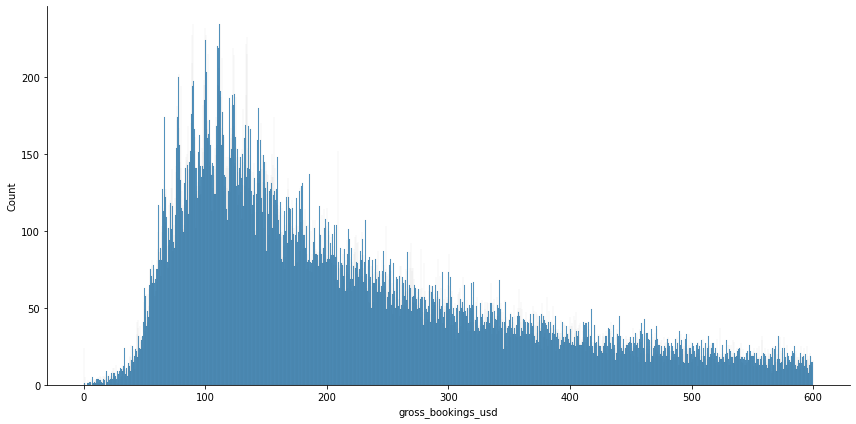

In [8]:
sns_distplot = sns.displot(data=df_comb, x='gross_bookings_usd', kind='hist',
            height=6, aspect=2, bins=2000,
            binrange=(0,600))

sns_distplot.figure.savefig("plots/distplot2.png")
# price_counted = df_comb['price_usd'].value_counts(ascending=False).head()


Insight in distribution of clicked and booked hotels

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

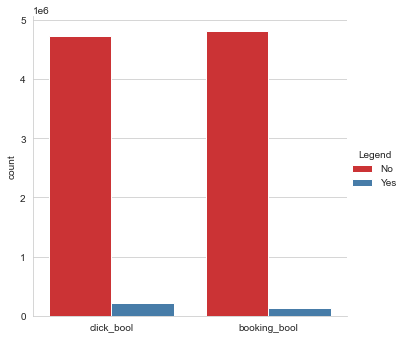

In [9]:
# heavily inspired by this: https://stackoverflow.com/questions/70761777/plotting-multiple-boolean-cols-in-seaborn
df_long = df_comb.melt(value_vars=['click_bool', 'booking_bool'], value_name='Legend').replace({'Legend': {0: 'No', 1: 'Yes'}})
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1')
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()
g.figure.savefig("plots/catplot.png")

we're only interested in the bookings so we can drop the rows were 'booking_bool' = 0

In [10]:
# check number of clicks (0) and bookings (1) in dataframe
# df_comb['booking_bool'].value_counts()
df_comb['click_bool'].value_counts()


# df_comb['booking_bool'].values.sum()

0    4736468
1     221879
Name: click_bool, dtype: int64

In [11]:
# df_comb = df_comb.drop(df_comb[df_comb.booking_bool == 0].index)
df_comb.shape

(4958347, 54)

In [12]:
# print(df_comb['prop_id'].nunique())
print(df_comb['prop_id'].value_counts().loc[lambda x: x>5])
# print(df_comb[df_comb.prop_id > 10 ].value_counts())
#  df2.mi.value_counts().loc[lambda x: x>5].reset_index()['index']
# print(df_comb['prop_id'].value_counts()>10 == True)

# df_comb = df_comb.drop(df_comb[df_comb.booking_bool == 0].index)


104517    2357
124342    2355
68420     2285
40279     2275
134154    2257
          ... 
69067        6
108709       6
2195         6
21975        6
122546       6
Name: prop_id, Length: 86493, dtype: int64


Add column with 'year' and 'month'

In [13]:
df_comb["date_time"] = pd.to_datetime(df_comb["date_time"])
df_comb["year"] = df_comb["date_time"].dt.year
df_comb["month"] = df_comb["date_time"].dt.month
df_comb["day"] = df_comb["date_time"].dt.day

df_comb

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month,day
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4,4
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,0.0,0.0,NaN,0,NaN,0,2013,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,0,NaN,0,2013,6,30
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,1,157.84,1,2013,6,30


In [14]:
display(df_comb[(df_comb['month'] == 8) & df_comb['booking_bool'] == 1].count())



srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate

Get insight in months that bookings are made

/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


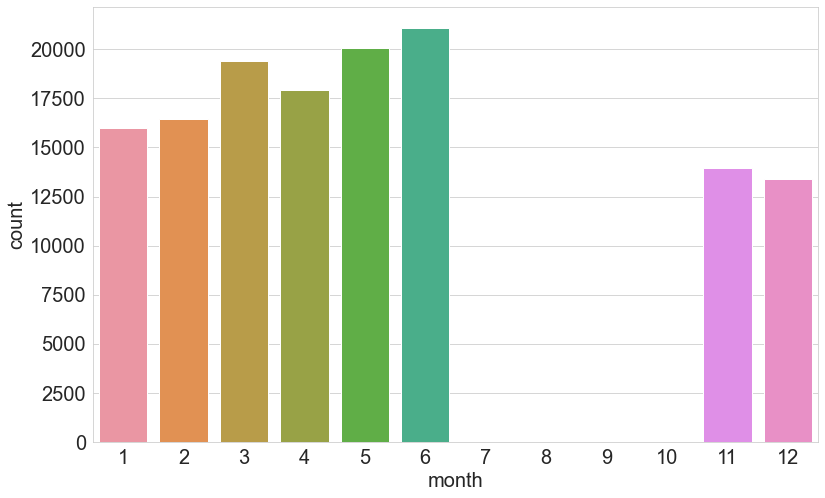

In [15]:
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns_countplot = sns.countplot('month',data=df_comb[df_comb["booking_bool"] == 1],order=list(range(1,13)),ax=ax)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
sns_countplot.figure.savefig("plots/countplot.png")

/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


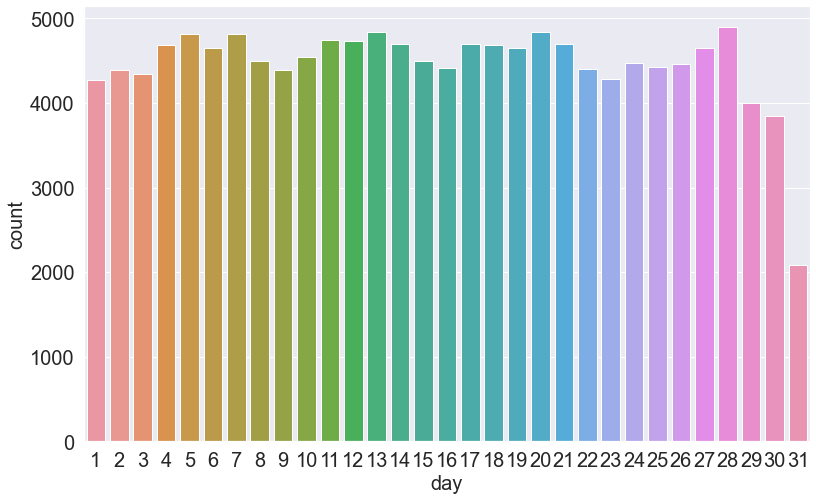

In [21]:
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns_countplot = sns.countplot('day',data=df_comb[df_comb["booking_bool"] == 1],order=list(range(1,32)),ax=ax)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
sns_countplot.figure.savefig("plots/countplotdays.png")

/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


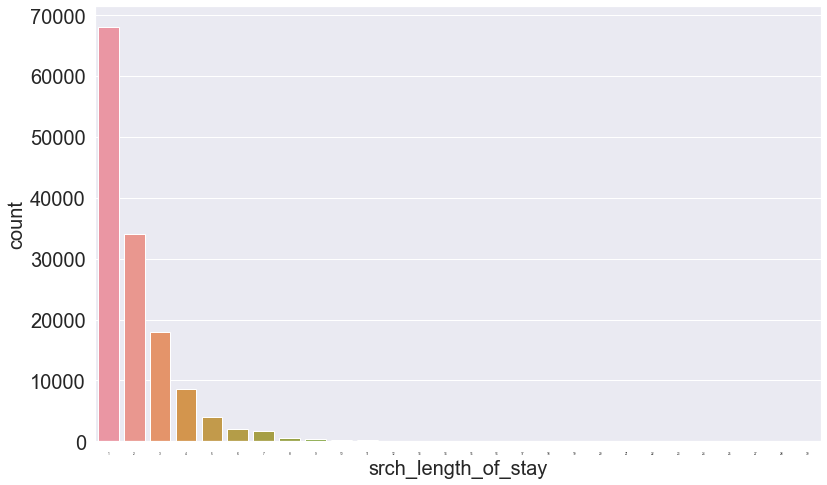

In [22]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
plt.locator_params(axis='x', nbins=10)
fig.set_size_inches(13, 8)
sns_count_days = sns.countplot('srch_length_of_stay',data=df_comb[df_comb["booking_bool"] == 1],ax=ax)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_yticklabels()):
    item.set_fontsize(20)
sns_count_days.figure.savefig("plots/countplotdays.png")

Correlation matrix

In [19]:
import seaborn as sns

sns.set(style="white")
sns.set(font_scale=.3)
mask = np.zeros_like(df_comb.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,5), dpi=2000)

sns_plot=sns.heatmap(df_comb.corr(), mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.set_context("paper")   

sns_plot.figure.savefig("plots/diagonalcorrelation.png",dpi=2000)

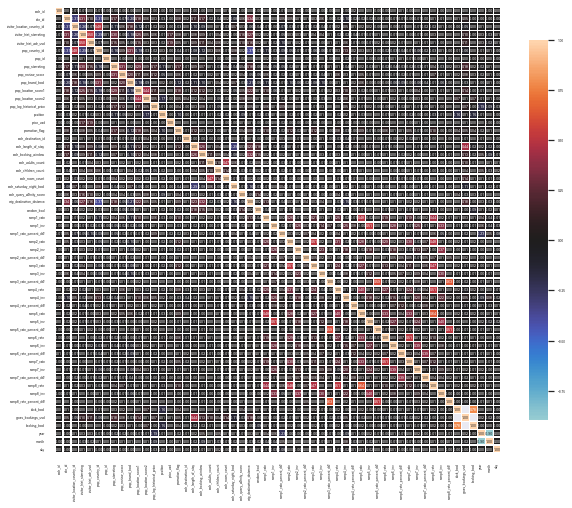

In [20]:



def correlation_heatmap(df_comb):
    correlations = df_comb.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(df_comb)